<a href="https://colab.research.google.com/github/Tclack88/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module1-afirstlookatdata/LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
2 + 2

4

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [0]:
# I'm following the example From here" "https://nbviewer.jupyter.org/github/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb"
# Importantly, the example there is working off an intentionally messy data set to demonstrate cleaning principles which I don't have to deal with
import pandas as pd

iris_data = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
import matplotlib.pyplot as plt
import seaborn as sb

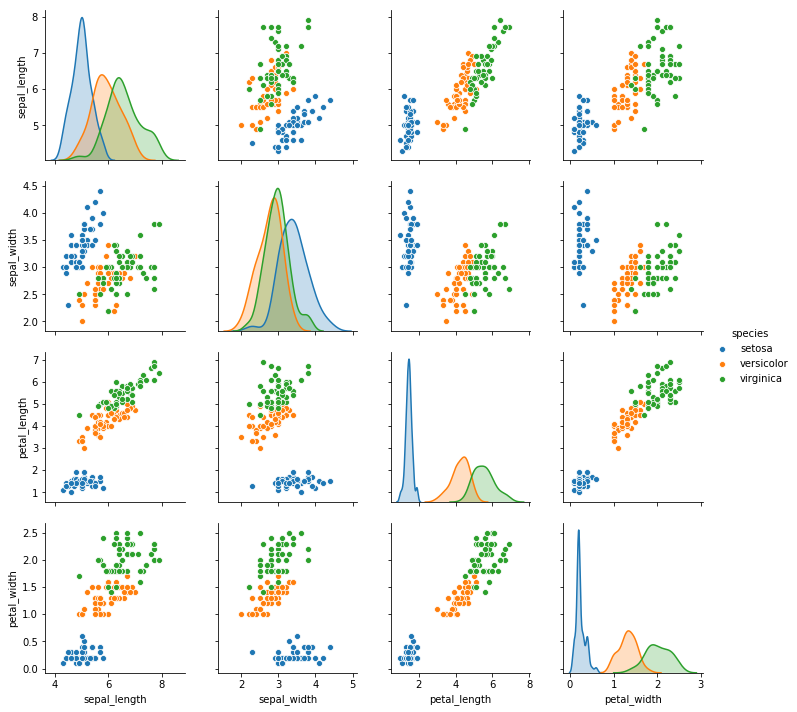

In [0]:
sb.pairplot(iris_data, hue='species');

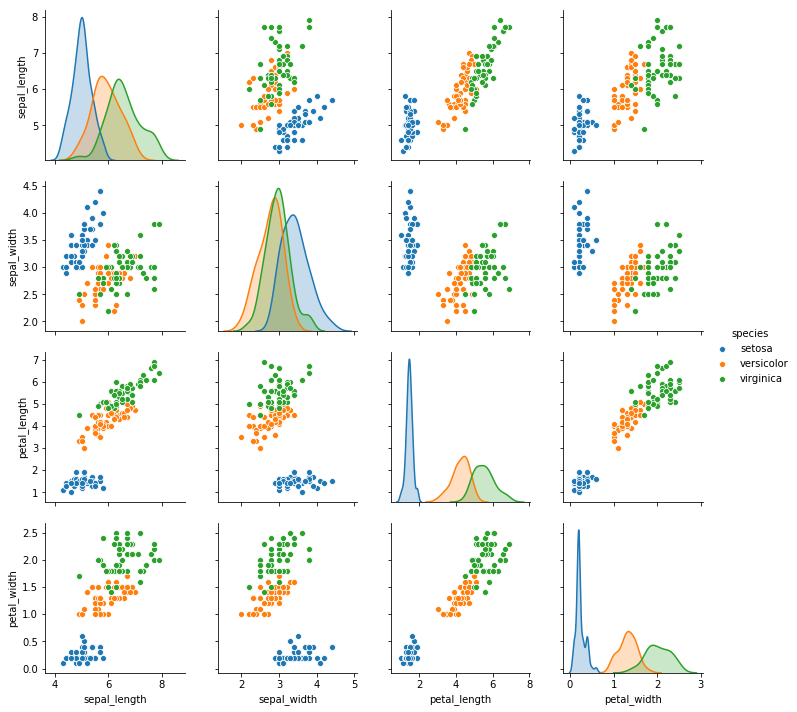

In [0]:
# There Appears to be one obvious outlier, the short sepal width of on of the sertosa species, so we remove it:
iris_data = iris_data[(iris_data.species != 'setosa') | (iris_data.sepal_width > 2.5)]
sb.pairplot(iris_data,hue='species');

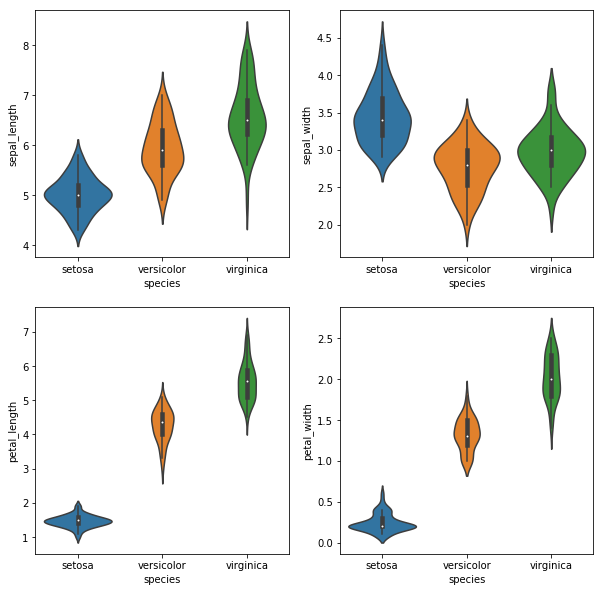

In [0]:
plt.figure(figsize=(10,10))
for idx,col in enumerate(iris_data.columns):
  if col == 'species':
    continue
  plt.subplot(2,2,idx+1)
  sb.violinplot(x='species',y=col,data=iris_data)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


species_rank = {'setosa':1,'versicolor':2,'virginica':3}
iris_copy = iris_data.copy()
iris_copy.species = iris_copy.species.map(species_rank)
iris_copy.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [0]:
train,test = train_test_split(iris_copy)
target = 'species'

features = list(iris_copy.columns)[:-1] # Save time in typing out all 4 feature columns
target = 'species'

model = DecisionTreeClassifier()
model.fit(train[features],train[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
from sklearn.metrics import accuracy_score

predictions = model.predict(test[features])
actual = test[target]

accuracy = accuracy_score(predictions,actual)*100

print("Accuracy:",round(accuracy,2),"%")

Accuracy: 94.74 %


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




#Assignment answers
##1.
I took data from irises (the length and width of their sepals & petals as well as what species they are). I plotted every variable with every other to see the trends. I examined the data for outliers (found one) and removed it. I then used a decision tree (basically a yes/no splitter based on the features of the flower data) to determine the metrics used for classifying the flowers on 3/4 of the data and tested this on the remaining 25% returning almost 95% accuracy.

##2.
I've never used seaborn, so I needed to read the documentation for every step of use

##3.
Although I was aware that seaborn existed, I didn't know it was just a high order frame work for matplot lib. This pairplot is pretty amazing. Very easy to find trends among all the data.

##4.
Doing the same sort of analysis with climate data

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.